# Régression linéaire
Utilisation de la régression linéaire sur des modèles autres que la simple droite (polynômes, sinus, exponentielles, etc...). 

## Préliminaires
### Importation des bibliothèque standards

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importation des librairies "Scikit Learn"
**sklearn.linear_model.LinearRegression** pour l'implémentation de la régression linéaire
**sklearn.preprocessing.PolynomialFratures** pour la génération de la base des monômes
**sklearn.metrics** pour le calcul de la performance de la régression
<br>*.mean_squared_error* > calcul de l'erreur quadratique moyenne
<br>*.r2_score* > calcul du coefficient de détermination R² 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Rappel théorique
### Rappel sur le calcul des éléments de la performance
**Erreur quadratique moyenne, ou *msean squared error* (MSE)**
<br>L'erreur quadratique mesure la précision d'un estimateur ${\hat  \theta }$ pour un paramètre $\theta$.
<br>
<br><center>${\displaystyle \operatorname {MSE} ({\hat {\theta }})\,{\overset {\text{def}}{=}}\,\mathbb {E} \left[({\hat {\theta }}-\theta )^{2}\right]}$</center>
<br>Nous pouvons exprimer l’erreur quadratique moyenne en fonction du biais et de la variance de l’estimateur :
<br>
<br><center>${\displaystyle \operatorname {MSE} ({\hat {\theta }})=\operatorname {Biais} ({\hat {\theta }})^{2}+\operatorname {Var} ({\hat {\theta }})}$</center>
<br>Cet indicateur peut être utilisé pour n'importe quel estimateur et pas seulement dans le cas de la régression linéaire.
<br><br>
**Coefficient de détermination R²**
<br>Le coefficient de détermination, noté R2 ou r2, est une mesure de la qualité de la prédiction (${\hat {y_{n}}}$) d'une régression linéaire sur une série de mesures ($y_n$).
<br>
<br><center>${\displaystyle R^{2}=1-{\frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}$</center>
<br>Le coefficient de détermination est le carré du coefficient de corrélation linéaire R entre les valeurs prédites $\hat {y_{i}}$ et les mesures $y_i$ :
<br><center>$R^{2}=corr({\hat {y}},y)^{2}$</center>
<br> avec $R=Cor(X,Y)={\frac {\operatorname {Cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}={\operatorname {E} [(X-\operatorname {E} (X))(Y-\operatorname {E} (Y))] \over \sqrt {E[(X-E(X)^{2})^{2}]} \sqrt {E[(Y-E(Y)^{2})^{2}]}}$

### Rappel du principe de base de la régression linéaire
**Notations**
<br>$\hat y_{i}$, les n prédictions du modèle
<br>$y_{i}$, les n mesures empiriques
<br>$x_{i}$, les n observations empiriques
<br>$\theta_{j}$, les m paramètres du modèles

<br><br>
**Approche**
<br><center> données = modèle sous-jacent + bruit irréductible</center>
<br>
Ici le modèle est linéaire, donc le modèle consiste forcément en une **combinaison linéaire des paramètres** (et pas forcément des mesures).

<br><br>
Exemples : 
* ${\hat y_{i}} = 1.\theta_{0} + x_{i}.\theta_{1}$, pour un modèle linéaire
* ${\hat y_{i}} = x_{i}^{0}.\theta_{0} + x_{i}^{1}.\theta_{1} + x_{i}^{2}.\theta_{2}$, pour un modèle polynômial de degrée 2
* ${\hat y_{i}} = \cos (0.x_{i}{\frac {2\pi}{T}}).\theta_{0} + \sin (0.x_{i}{\frac {2\pi}{T}}).\theta_{1} + \cos (1.x_{i}{\frac {2\pi}{T}}).\theta_{2} + \sin (1.x_{i}{\frac {2\pi}{T}}).\theta_{3}$, pour un modèle de type décomposition en série fournier
* ${\hat y_{i}} = {e}^{-(x_{i}-0)^{2}}.\theta_{0} + {e}^{-(x_{i}-1)^{2}}.\theta_{1} + {e}^{-(x_{i}-2)^{2}}.\theta_{2}$, pour un modèle du type décomposition en peigne de gaussienne

De manière générale tous les modèles du type suivant sont valables : ${\hat y_{i}} = f_{0}(x_{i}).\theta_{0} + f_{1}(x_{i}).\theta_{1} + ... + f_{j}(x_{i}).\theta_{j} = f_{j}(x_{i}).\theta_{j}$

<br>
La notation matricielle du modèle devient : ${\hat Y}=F(X)\theta$
<br>Les mesures sont des observations du modèle à un bruit près : ${Y=F(X)\theta+\epsilon}$, bruit que nous cherchons à minimiser.
<br>
<br>Le problème consiste à trouver l'estimateur des paramètres du modèle qui minimiser l'erreur soit: 
<center>$\hat{\theta} = \text{argmin}_{\theta} E(\theta)$ </center>
où $E(\theta) = \vert\vert \hat{y}_i - y_i \vert\vert_2 = \vert\vert f_{j}(x_{i}).\theta_{j} - y_i \vert\vert_2  $

<br><br>
**Solution analytique**
<br>La solution exacte au problème est :
<center>$\hat{\theta} = ({F(X)}^{T}F(X))^{-1}{F(X)}^{T}y$</center>
<a href="http://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression">>Démonstration</a>

<br><br>
**Solution approchée**
<br>La solution peut aussi être approchée par une méthode d'optimisationnumérique (par exemple une descente de gradient) lorsque le volume de données est trop grand pour une inversion de matrice. 

## Modèle d'une fonction affine
### Données de test

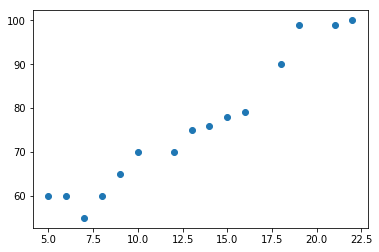

In [3]:
XT = np.array([5,6,7,8,9,10,12,13,14,15,16,18,19,21,22])
YT = np.array([60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

plt.scatter(XT,YT)
plt.show()

### Méthode 1 : Calcul matriciel
Nous appliquons la solution théorique ci-dessus, en considérant le modèle suivant :
<center>${\hat y_{i}} = x_{i}^{0}.\theta_{0} + x_{i}^{1}.\theta_{1}$</center>
<br>Le vecteur contenant les données de test $(x_{i})$ doit donc être transformées dans une matrice $(x_{i}^{0}, x_{i}^{1})=(1,x_{i})$.

In [4]:
X = np.column_stack((np.ones(XT.shape[0]),XT))
print('X= \n %s' %X)

X= 
 [[ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 21.]
 [ 1. 22.]]


Nous appliquons ensuite la formule matricielle pour trouver l'ensemble des paramètres :
<center>$\hat{\theta} = (X^{T}X)^{-1}{X}^{T}y$</center>

In [5]:
theta =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(YT)
print('theta=%s' %(theta))

theta=[40.60238095  2.70238095]


**Résultats**


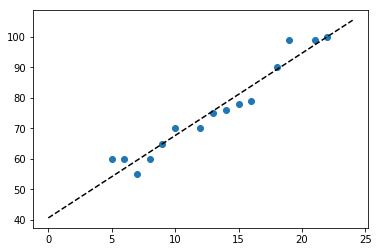

In [6]:
XM = np.arange(0,25,1)
YM = theta[1]*XM+theta[0]

plt.scatter(XT,YT)
plt.plot(XM,YM,c='k',linestyle='--')
plt.show()

In [7]:
YP = theta[1]*XT+theta[0]
print('coef=%s' %(theta))
print('r2 =', r2_score(YT,YP))

coef=[40.60238095  2.70238095]
r2 = 0.9452281652275488


Le meilleur modèle linéaire est : $Y=2.70X+40.6$.
<br>Le coefficient de détermination est très bon ($R²>0.9$).

### Méthode 2 : Utilisation de la librairie Scikit Learn

La librairie **LinearRegression()** permet de simplifier la démarche, notamment grace aux fonctions :
* **.fit(X,y)**, qui effectue la régression linéaire pour adapter au mieux la représentation du modèle basé sur les observations X à l'ensemble des mesures empiriques y, en modifiant les paramètres du modèle $\theta$
* **.predict(X)**, qui calcule des prédictions du modèle pour des futures observations X
* **.score(X,y)**, qui calcule le R² pour la régression linéaire

<br>Pour **récupérer la valeur des paramètres** du modèle une fois la régression linéaire réalisée, il faut lire dans l'objet LinearRegression() :
* **.intercept_**, qui correspond à $\theta_{0}$ (où ordonnée à l'origine dans le cas d'un modèle polynomial)
* **.coef_**, qui correspond aux $(\theta_{i})_{i\in[1,m]}$ (où m est le nombre de paramètre dans le modèle)

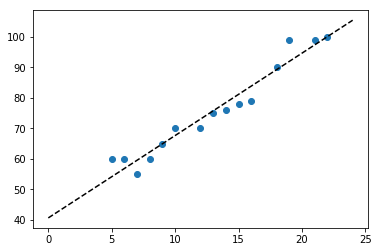

In [8]:
X = XT.reshape(-1,1)
regression = LinearRegression().fit(X,YT)

XM = np.arange(0,25,1).reshape(-1,1)
YM = regression.predict(XM)

plt.scatter(XT,YT)
plt.plot(XM,YM,c='k',linestyle='--')
plt.show()

In [9]:
theta = np.array([regression.intercept_,regression.coef_[0]])
print('coef=%s' %(theta))
print('r2 = %s' %regression.score(X,YT))

coef=[40.60238095  2.70238095]
r2 = 0.9452281652275489


Le résultat est le même que pour la méthode matricielle.

## Modèle polynômial
### Données de test

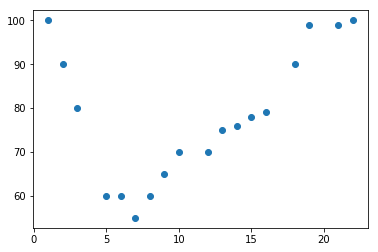

In [10]:
XT = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22])
YT = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

plt.scatter(XT,YT)
plt.show()

### Méthode 1 : Calcul matriciel
Il faut calculer la matrice de vandermonde à partir des observations pour nourir le modèle.

In [11]:
X = np.column_stack((XT**0,XT**1,XT**2,XT**3))
print(X)

[[    1     1     1     1]
 [    1     2     4     8]
 [    1     3     9    27]
 [    1     5    25   125]
 [    1     6    36   216]
 [    1     7    49   343]
 [    1     8    64   512]
 [    1     9    81   729]
 [    1    10   100  1000]
 [    1    12   144  1728]
 [    1    13   169  2197]
 [    1    14   196  2744]
 [    1    15   225  3375]
 [    1    16   256  4096]
 [    1    18   324  5832]
 [    1    19   361  6859]
 [    1    21   441  9261]
 [    1    22   484 10648]]


In [12]:
theta =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(YT)
print(theta)

[ 1.13768037e+02 -1.55383039e+01  1.34333191e+00 -3.03208795e-02]


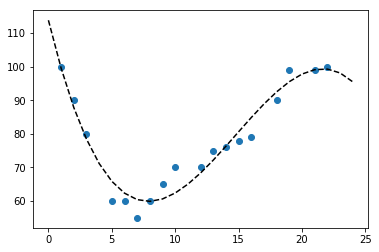

In [13]:
# Observation du modèle
XM = np.arange(0,25,1)
YM = theta[0] + theta[1]*XM + theta[2]*XM**2 + theta[3]*XM**3

plt.scatter(XT,YT)
plt.plot(XM,YM,c='k',linestyle='--')
plt.show()

In [14]:
#calcul de la performance
YP = theta[0] + theta[1]*XT + theta[2]*XT**2 + theta[3]*XT**3
print('coef=%s' %(theta))
print('r2 =', r2_score(YT,YP))

coef=[ 1.13768037e+02 -1.55383039e+01  1.34333191e+00 -3.03208795e-02]
r2 = 0.9432150416451027


### Méthode 2 : Utilisation de la librairie poly1d

In [15]:
poly = np.poly1d(np.polyfit(XT, YT, 3))
print('P(x)=%s' %poly)

P(x)=          3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8


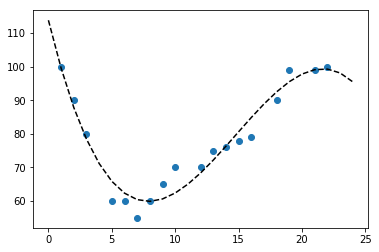

In [16]:
plt.scatter(XT,YT)
plt.plot(XM,poly(XM),c='k',linestyle='--')
plt.show()

In [17]:
print('coef=%s' %(poly.coef[::-1]))
print('r2 =', r2_score(YT,poly(XT)))

coef=[ 1.13768037e+02 -1.55383039e+01  1.34333191e+00 -3.03208795e-02]
r2 = 0.9432150416451025


### Méthode 3 : Utilisation de la librairie Scikit Learn

La librairie **PolynomialFeatures** permet de simplifier la démarche en calculant directement la représentation du modèle à partir de la liste des observations.

L'utilisation se fait en deux étapes:
* Instancier un objet de la classe **PolynomialFeatures(degree=n)** en indiquant le degrée du polynôme.
* Générer l'ensemble des monônes avec la fonction **.fit_transform(X)** à partir de la liste des observations en entrée. 

<br>**Remarque**
* Dans le cas 1D, cette classe génère finalement des matrice de Vandermonde.
* Cette classe fonctionne très bien aussi dans le cas où le modèle repose sur p variables $(X_{k})$.

<a href="https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn">>Référence</a>
<br>
<br>Exemple:
<br>Génération de la représentation du modèle polynomial de degré 2 sur la base de deux variables $(X_{i},Y_{i})$ connues sur n observations.
<br><center>$P(X,Y,2) = (1 \space\space x_{i} \space\space y_{i} \space\space x_{i}y_{i} \space\space x_{i}^{2} \space\space y_{i}^{2})_{i\in[1,n]}$</center>




In [18]:
poly = PolynomialFeatures(degree = 3)
XTbase = poly.fit_transform(XT.reshape(-1,1))

pd.DataFrame(XTbase,columns=poly.get_feature_names()).head()

,1,x0,x0^2,x0^3
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,5.0,25.0,125.0
4,1.0,6.0,36.0,216.0


In [19]:
regression = LinearRegression().fit(XTbase,YT)
XM = np.arange(0,25,1)
XMbase = poly.fit_transform(XM.reshape(-1,1))
YM = regression.predict(XMbase)

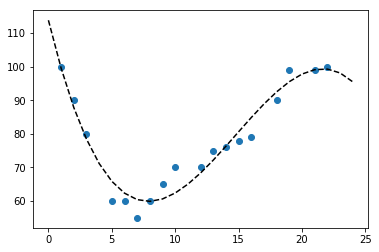

In [20]:
plt.scatter(XT,YT)
plt.plot(XM,YM,c='k',linestyle='--')
plt.show()

In [21]:
coef = np.append(regression.intercept_,regression.coef_[1:])
print('coef=%s' %(coef))
print('r2 =', regression.score(XTbase, YT))

coef=[ 1.13768037e+02 -1.55383039e+01  1.34333191e+00 -3.03208795e-02]
r2 = 0.9432150416451026


## Modèle sinusoïdal
### Données de test

In [22]:
def sinn(X,T,n):
    return np.sin(X*(2*n*np.pi/T))

def cosn(X,T,n) :
    return np.cos(X*(2*n*np.pi/T))

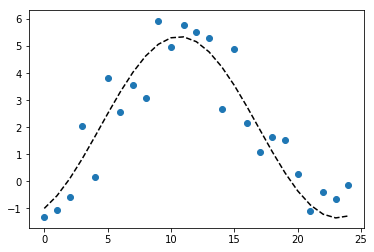

In [23]:
T = 25
e = 3
XT = np.arange(0,25,1)
YT = 2 + 1.5*sinn(XT,0.95*T,1) - 3*cosn(XT,1.05*T,1) + e*(np.random.random(25,)-0.5)
Y = 2*cosn(XT,T,0) + 0*sinn(XT,T,0) - 3*cosn(XT,T,1) + 1.5*sinn(XT,T,1)

plt.scatter(XT,YT)
plt.plot(XT,Y,c='k',linestyle='--')
plt.show()

### Méthode 1 : Calcul matriciel

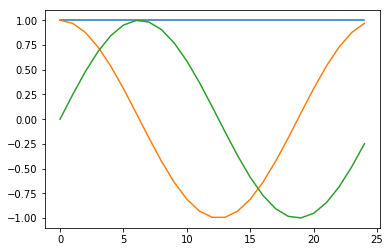

In [24]:
X = np.column_stack((cosn(XT,T,0),cosn(XT,T,1),sinn(XT,T,1)))
plt.plot(XT,X[:,0])
plt.plot(XT,X[:,1])
plt.plot(XT,X[:,2])
plt.show()

In [25]:
print('cible = %s' %[2,-3,1])
theta =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(YT)
print('theta = %s' %theta)

cible = [2, -3, 1]
theta = [ 2.07064685 -2.86392339  1.18515595]


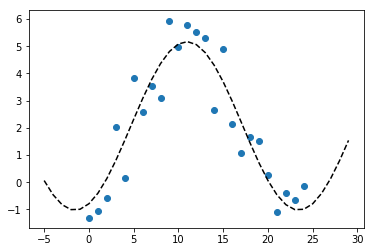

In [26]:
XM = np.arange(-5,30,1)
YM = theta[0]*cosn(XM,T,0)+ theta[1]*cosn(XM,T,1) + theta[2]*sinn(XM,T,1)

plt.scatter(XT,YT)
plt.plot(XM,YM,c='k',linestyle='--')
plt.show()

In [27]:
YP = theta[0]*cosn(XT,T,0)+ theta[1]*cosn(XT,T,1) + theta[2]*sinn(XT,T,1)
print('coef = %s' %theta)
print('r2 =', r2_score(YT,YP))

coef = [ 2.07064685 -2.86392339  1.18515595]
r2 = 0.8611285409523145


### Méthode 2 : Utilisation de la librairie Scikit Learn

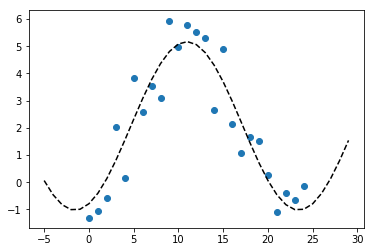

In [28]:
XTbase = np.column_stack((cosn(XT,T,0),cosn(XT,T,1),sinn(XT,T,1)))

regression = LinearRegression().fit(XTbase,YT)

XM = np.arange(-5,30,1)
XMbase = np.column_stack((cosn(XM,T,0),cosn(XM,T,1),sinn(XM,T,1)))
YM = regression.predict(XMbase)

plt.scatter(XT,YT)
plt.plot(XM,YM,c='k',linestyle='--')
plt.show()

In [29]:
coef = np.append(regression.intercept_,regression.coef_[1:])
print('coef=%s' %(coef))
print('r2 =', regression.score(XTbase, YT))

coef=[ 2.07064685 -2.86392339  1.18515595]
r2 = 0.8611285409523145


## Modèle gaussien
### Générateur de familles gaussiennes

In [30]:
def gaussa(X,a):
    return np.exp(-(X-a)**2)

In [31]:
nbase = 15

In [32]:
npoint = 1000
xmin = 0
xmax = 25

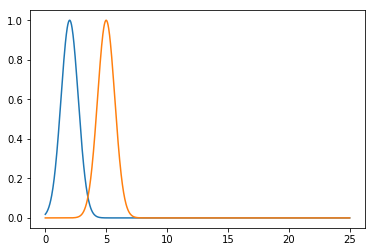

In [33]:
x = np.linspace(xmin,xmax,npoint)
plt.plot(x,gaussa(x,2))
plt.plot(x,gaussa(x,5))
plt.show()

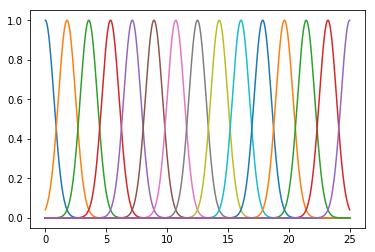

In [34]:
A = np.linspace(xmin,xmax,nbase)
X = np.array([[]]*npoint)
for a in A:
    X = np.column_stack((X,gaussa(x,a)))
    
plt.plot(x,X)
plt.show()

### Exemple 1 : Application sur une fonction linéaire

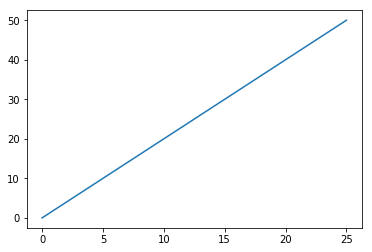

In [35]:
XT = np.linspace(xmin,xmax,npoint)
YT = 2*XT

plt.plot(XT,YT)
plt.show()

In [36]:
theta =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(YT)
print('theta = %s' %theta.reshape(-1,1))

theta = [[ 0.17860837]
 [ 3.54506354]
 [ 7.17473197]
 [10.74879405]
 [14.3341624 ]
 [17.91723489]
 [21.50077437]
 [25.08421487]
 [28.66769595]
 [32.25106793]
 [35.83495884]
 [39.41629739]
 [43.01022924]
 [46.53939501]
 [50.71933741]]


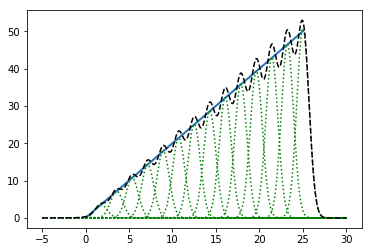

In [37]:
XM = np.linspace(xmin-5,xmax+5,npoint)

Xbase = np.array([[]]*npoint)
for a in A:
    Xbase = np.column_stack((Xbase,gaussa(XM,a)))
YM = Xbase.dot(theta)

Yshape = (theta[:,None][:,None]*Xbase.T[:,None]).squeeze(1)

plt.plot(XT,YT,linewidth='2')
for i in range(Yshape.shape[0]):
    plt.plot(XM,Yshape[i,:],c='g',linestyle=':')
plt.plot(XM,YM,c='k',linestyle='--')
plt.show()

In [38]:
Xbase = np.array([[]]*npoint)
for a in A:
    Xbase = np.column_stack((Xbase,gaussa(XT,a)))
YP = Xbase.dot(theta)

print('r2 =', r2_score(YT,YP))

r2 = 0.9839182419657518


### Exemple 2 : Application sur une fonction sinus

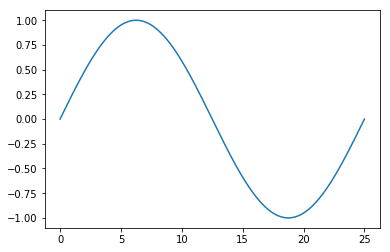

In [39]:
XT = np.linspace(xmin,xmax,npoint)
YT = np.sin(2*np.pi*(XT/(xmax)))

plt.plot(XT,YT)
plt.show()

In [40]:
theta =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(YT)
print('theta = %s' %theta.reshape(-1,1))

theta = [[ 2.42506650e-02]
 [ 4.36341608e-01]
 [ 7.96650523e-01]
 [ 9.91878795e-01]
 [ 9.92136227e-01]
 [ 7.95587834e-01]
 [ 4.41524543e-01]
 [-2.33905186e-16]
 [-4.41524543e-01]
 [-7.95587834e-01]
 [-9.92136227e-01]
 [-9.91878795e-01]
 [-7.96650523e-01]
 [-4.36341608e-01]
 [-2.42506650e-02]]


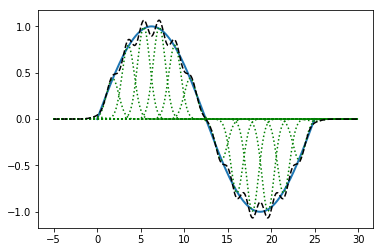

In [41]:
XM = np.linspace(xmin-5,xmax+5,npoint)

Xbase = np.array([[]]*npoint)
for a in A:
    Xbase = np.column_stack((Xbase,gaussa(XM,a)))
YM = Xbase.dot(theta)

Yshape = (theta[:,None][:,None]*Xbase.T[:,None]).squeeze(1)

plt.plot(XT,YT,linewidth='2')
for i in range(Yshape.shape[0]):
    plt.plot(XM,Yshape[i,:],c='g',linestyle=':')
plt.plot(XM,YM,c='k',linestyle='--')
plt.show()

In [42]:
Xbase = np.array([[]]*npoint)
for a in A:
    Xbase = np.column_stack((Xbase,gaussa(XT,a)))
YP = Xbase.dot(theta)

print('r2 =', r2_score(YT,YP))

r2 = 0.99430228525841


## Modèle exponentiel
### Théorie
Pour traiter le cas exponentiel, il suffit de remarque que la régression sur un modèle exponentiel peut-être **ramené à un problème de regression affine**:
<br>
<br><center>${\hat y_{i}} = \theta_{0}.e^{\theta_{1}.x_{i}}
\Rightarrow \ln(\hat y_{i}) = \ln(\theta_{0}) \space + \space \theta_{1}.x_{i}$</center> 
### Données de test

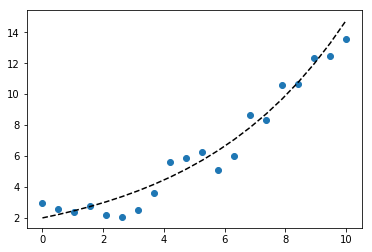

In [43]:
e = 3
xmin = 0
xmax = 10
npoint = 20
XT = np.linspace(xmin,xmax,npoint)
YT = 2*np.exp(0.2*XT) + e*(np.random.random(npoint,)-0.5)
Y = 2*np.exp(0.2*XT)

plt.scatter(XT,YT)
plt.plot(XT,Y,c='k',linestyle='--')
plt.show()

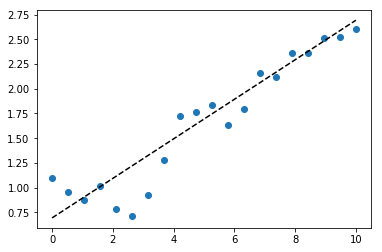

In [44]:
lnYT = np.log(YT)
lnY = np.log(2) + 0.2*XT
plt.scatter(XT,lnYT)
plt.plot(XT,lnY,color='k',linestyle='--')
plt.show()

### Utilisation de Scikit Learn

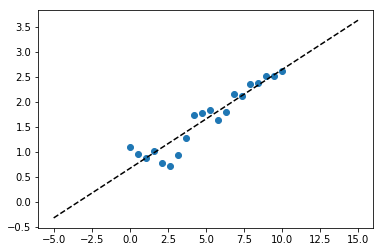

In [45]:
regression = LinearRegression().fit(XT.reshape(-1,1),lnYT)

XM = np.linspace(xmin-5,xmax+5,100).reshape(-1,1)
YM = regression.predict(XM)

plt.scatter(XT,lnYT)
plt.plot(XM,YM,color='k',linestyle='--')
plt.show()

In [46]:
ln_coef = np.append(regression.intercept_,regression.coef_)
print(ln_coef)

[0.6622604  0.19781949]


**Conversion des coefficients**
<br>$\theta_{0}=\ln(a) \Rightarrow a=e^{\theta_{0}}$ 
<br>$\theta_{1}=b \Rightarrow b = \theta_{1}$

In [47]:
coef = np.array([np.exp(ln_coef[0]),ln_coef[1]])
print('cible = %s' %[2,0.2])
print('coef = %s' %coef)

cible = [2, 0.2]
coef = [1.93917068 0.19781949]


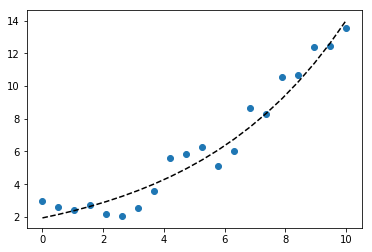

In [48]:
YP = coef[0]*np.exp(coef[1]*XT)

plt.scatter(XT,YT)
plt.plot(XT,YP,color='k',linestyle='--')
plt.show()

In [49]:
score = regression.score(XT.reshape(-1,1),lnYT)
print('score = %s' %score)
print('r2 =', r2_score(YT,YP))

score = 0.8919227348649283
r2 = 0.95253820433933
